In [1]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
plates = [
    "078_20220920",
    "079_20220920",
    "080_20220920",
    "081_20220920",
    "082_20220920",
    "083_20220920",
    "084_20220920",
    "001_20220920",
    "024_20220920",
    "073_20220920",
    "002_20220920",
    "003_20220920",
    "004_20220920",
    "005_20220920",
    "006_20220920",
    "007_20220920",
    "008_20220920",
    "009_20220920",
    "010_20220920",
    "011_20220920",
    "012_20220920",
    "019_20220920",
    "020_20220920",
    "021_20220920",
    "022_20220920",
    "023_20220920",
    "037_20220920",
    "038_20220920",
    "039_20220920",
    "040_20220920",
    "042_20220920",
    "043_20220920",
    "044_20220920",
    "045_20220920",
    "046_20220920",
    "016_20220921",
    "017_20220921",
    "034_20220921",
    "051_20220920",
    "094_20220921",
    "064_20220921",
    "026_20220921",
    "027_20220921",
    "028_20220921",
    "029_20220921",
    "031_20220921",
    "033_20220921",
    "035_20220921",
    "036_20220921",
    "047_20220920",
    "041_20220920",
    "015_20220921",
    "068_20220921",
    "107_20220921",
    "095_20220921",
    "062_20220921",
    "096_20220921",
    "104_20220921",
    "050_20220920",
    "030_20220921",
    "025_20220921",
    "100_20220921",
    "067_20220921",
    "048_20220920",
    "055_20220921",
    "056_20220921",
    "057_20220921",
    "058_20220921",
    "059_20220921",
    "060_20220921",
    "061_20220921",
    "063_20220921",
    "014_20220921",
    "018_20220921",
    "099_20220921",
    "069_20220921",
    "054_20220920",
    "075_20220920",
    "092_20220921",
    "093_20220921",
    "097_20220921",
    "098_20220921",
    "105_20220921",
    "106_20220921",
    "108_20220921",
    "085_20220921",
    "086_20220921",
    "087_20220921",
    "088_20220921",
    "089_20220921",
    "090_20220921",
    "091_20220921",
    "049_20220920",
    "052_20220920",
    "053_20220920",
    "074_20220920",
    "076_20220920",
    "077_20220920",
    "013_20220921",
    "070_20220921",
    "071_20220921",
    "072_20220921",
    "102_20220921",
    "032_20220921",
    "101_20220921",
    "065_20220921",
    "066_20220921",
    "103_20220921",
]
plates = [
    "_".join((str(int(plate.split("_")[0])), str(int(plate.split("_")[1]))))
    for plate in plates
]
directory_targ = directory_project

In [4]:
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/805 [00:00<?, ?it/s]

In [ ]:
plates = ["43_20220920"]

In [5]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]

In [ ]:
len(folders)

In [6]:
folders = all_folders.loc[all_folders["folder"] == "20221003_1556_Plate01"]

In [7]:
folders

,total_path,Plate,strain,medium,CrossDate,/Img/TileConfiguration.txt.registered,/Analysis/skeleton_compressed.mat,/Analysis/skeleton_masked_compressed.mat,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,...,/Analysis/nx_graph_pruned_labeled.p,date,folder,PrincePos,root,split,Pbait,Temperature,unique_id,datetime
283,/projects/0/einf914/data/20221003_1556_Plate01,039,'A5','5DS',20220920,True,True,True,True,True,...,True,"03.10.2022, 15:56:",20221003_1556_Plate01,NaN,NaN,NaN,NaN,NaN,39_20220920,2022-10-03 15:56:00


In [9]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)

In [ ]:
folders = folders.sort_values(by="datetime")
folders

In [4]:
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
directory = directory_targ

/projects/0/einf914/data/Analysis_93_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_5_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_69_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_26_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_32_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_43_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_101_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_42_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_15_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_65_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_28_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_39_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_108_20220921_200_Version1/folder_info.json
/projects/0

In [7]:
from amftrack.pipeline.launching.run_super import run_parallel_post
from amftrack.pipeline.functions.post_processing.global_plate import *
from amftrack.pipeline.functions.post_processing.time_plate import *
from amftrack.pipeline.functions.post_processing.time_edge import *
from amftrack.pipeline.functions.post_processing.exp_plot import *

In [8]:
time = "1:00:00"
name_job = "malin"

list_args = [[]] * len(list_f)
overwrite = True
num_parallel = 6
run_parallel_post(
    "time_edge_post_process.py",
    list_f,
    list_args,
    [directory, overwrite],
    analysis_folders,
    num_parallel,
    time,
    "edge_post_process",
    cpus=32,
    name_job=name_job,
    node="fat",
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911958


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911959


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911960


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911961


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911962


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911963


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911964


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911965


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911966


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911967


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911968


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911969


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911970


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911971


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911972


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911974


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911975


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1911976


In [17]:
list_f = [
    get_tot_length_C,
    get_tot_length_straight,
    get_time_since_start,
    get_time_since_begin_exp,
    get_width_edge,
    get_pos_x,
    get_pos_y,
]
list_args = [{}] * len(list_f)
# list_args= [[500],[1000],[2000]]+[[]]
# list_args= [[500]]
overwrite = True
load_graphs = True
num_parallel = 32
time = "1:00:00"
for index, row in analysis_folders.iterrows():
    folder = row["folder_analysis"]
    path_time_plate_info = row["path_time_plate_info"]
    plate = row["Plate"]
    num_cpus = 32
    if os.path.isfile(f"{directory_targ}{path_time_plate_info}"):
        whole_plate_info = pd.read_json(
            f"{directory_targ}{path_time_plate_info}", convert_dates=True
        ).transpose()
        whole_plate_info.index.name = "t"
        whole_plate_info.reset_index(inplace=True)
        run_parallel_post(
            "time_edge_post_process.py",
            list_f,
            list_args,
            [directory_targ, overwrite, load_graphs],
            whole_plate_info,
            num_parallel,
            time,
            "edge_post_process",
            cpus=num_cpus,
            name_job=name_job,
            node="fat",
        )
        # break

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912861


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912862


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912863
Submitted batch job 1912864


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912865


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912866


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912867


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912868


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912869


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912870


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912871


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912872


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912873


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912874


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912875


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912876


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912878


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912879
Submitted batch job 1912880


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912881


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912882


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912883


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912884


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912885


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912886


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912887


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912888


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912890


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912891


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912892


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912893


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912894


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912895


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912896


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912897


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912898


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912899


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912900


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912901
Submitted batch job 1912913


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912914


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912916


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912917


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912918


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912919


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912920


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912921


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912922


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912923


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912924


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912925
Submitted batch job 1912926


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912927


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912928


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912929


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912930


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912932


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912933


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912934


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912935


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912936
Submitted batch job 1912937


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912938


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912939


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912940


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912941


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912942


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912943


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912944


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912945


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912946


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912947


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912948


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912949


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912950


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912951
Submitted batch job 1912952


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912953


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912954


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912955


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912956


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912957


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912958


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912959
Submitted batch job 1912960


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912961
Submitted batch job 1912962


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912963


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912964
Submitted batch job 1912965


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912966
Submitted batch job 1912967


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912968
Submitted batch job 1912969


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912970
Submitted batch job 1912971


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912972


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912973
Submitted batch job 1912974


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912975
Submitted batch job 1912976


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912977


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912978


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912979


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912980


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912981


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1912982


In [18]:
from amftrack.util.dbx import upload_folder

update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
dir_drop = "DATA/PRINCE"

for index, row in analysis_folders.iterrows():
    folder = row["folder_analysis"]
    id_unique = row["unique_id"]
    path = os.path.join(directory_targ, folder)
    target_drop = f"/{dir_drop}/{id_unique}/{folder}"
    print(dir_drop)
    upload_folder(path, target_drop, delete=False)

/projects/0/einf914/data/Analysis_93_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_5_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_69_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_26_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_32_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_43_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_101_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_42_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_15_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_65_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_28_20220921_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_39_20220920_200_Version1/folder_info.json
/projects/0/einf914/data/Analysis_108_20220921_200_Version1/folder_info.json
/projects/0

Uploaded:   0%|          | 0/4330138 [00:00<?, ?it/s]

2022-12-07 12:17:33,610-[INFO]- dropbox:390 -> Refreshing access token.
2022-12-07 12:17:33,845-[INFO]- dropbox:474 -> Request to files/upload_session/start
2022-12-07 12:17:34,902-[INFO]- dropbox:474 -> Request to files/upload_session/finish
DATA/PRINCE
2022-12-07 12:17:36,750-[INFO]- dropbox:390 -> Refreshing access token.
2022-12-07 12:17:36,976-[INFO]- dropbox:474 -> Request to files/upload
2022-12-07 12:17:37,863-[INFO]- dropbox:390 -> Refreshing access token.
2022-12-07 12:17:38,102-[INFO]- dropbox:474 -> Request to files/upload
2022-12-07 12:17:39,270-[INFO]- dropbox:390 -> Refreshing access token.
2022-12-07 12:17:39,498-[INFO]- dropbox:474 -> Request to files/upload
2022-12-07 12:17:40,306-[INFO]- dropbox:390 -> Refreshing access token.
2022-12-07 12:17:40,548-[INFO]- dropbox:474 -> Request to files/upload
2022-12-07 12:17:41,722-[INFO]- dropbox:390 -> Refreshing access token.
2022-12-07 12:17:41,947-[INFO]- dropbox:474 -> Request to files/upload
2022-12-07 12:17:43,092-[INFO]

In [10]:
exp = Experiment(directory_targ)
exp.load(folders)
exp.dates.sort()

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-10-03 15:56:00


In [13]:
for t in range(exp.ts):
    exp.load_tile_information(t)

In [14]:
for t in range(exp.ts):
    exp.load_tile_information(t)

load_graphs(exp, directory_targ, post_process=False)

In [16]:
get_all_edges(exp, t)

[Edge(202,345),
 Edge(345,347),
 Edge(345,346),
 Edge(347,346),
 Edge(347,348),
 Edge(346,348),
 Edge(348,349),
 Edge(349,351),
 Edge(349,350),
 Edge(351,350),
 Edge(351,352),
 Edge(350,354),
 Edge(352,356),
 Edge(352,355),
 Edge(356,355),
 Edge(356,358),
 Edge(355,354),
 Edge(354,357),
 Edge(358,357),
 Edge(358,360),
 Edge(357,359),
 Edge(360,359),
 Edge(360,362),
 Edge(359,361),
 Edge(362,361),
 Edge(362,366),
 Edge(361,363),
 Edge(366,363),
 Edge(366,367),
 Edge(363,367),
 Edge(367,208),
 Edge(422,326),
 Edge(339,336),
 Edge(336,337),
 Edge(336,335),
 Edge(240,395),
 Edge(395,394),
 Edge(395,393),
 Edge(394,388),
 Edge(394,391),
 Edge(388,386),
 Edge(388,389),
 Edge(386,384),
 Edge(386,387),
 Edge(389,390),
 Edge(389,391),
 Edge(391,393),
 Edge(384,383),
 Edge(384,385),
 Edge(380,382),
 Edge(380,378),
 Edge(380,381),
 Edge(382,383),
 Edge(382,381),
 Edge(383,385),
 Edge(385,387),
 Edge(376,375),
 Edge(376,378),
 Edge(376,377),
 Edge(375,374),
 Edge(375,377),
 Edge(378,379),
 Edge(38

In [20]:
import numpy as np

In [35]:
def is_in_circle(pos,center,radius):
    return(np.linalg.norm(pos-center)<=radius)
edges = get_all_edges(exp, t)
edges_center = [edge for edge in edges if is_in_circle(edge.end.pos(t),np.array([4700*5,4400*5]),3900*5) or is_in_circle(edge.begin.pos(t),np.array([4700*5,4400*5]),3900*5)]

In [29]:
edges[0]

Edge(202,345)

In [36]:
len(edges),len(edges_center)

(194, 150)

In [25]:
edges[0].begin.pos(t)

array([36858,  5803])

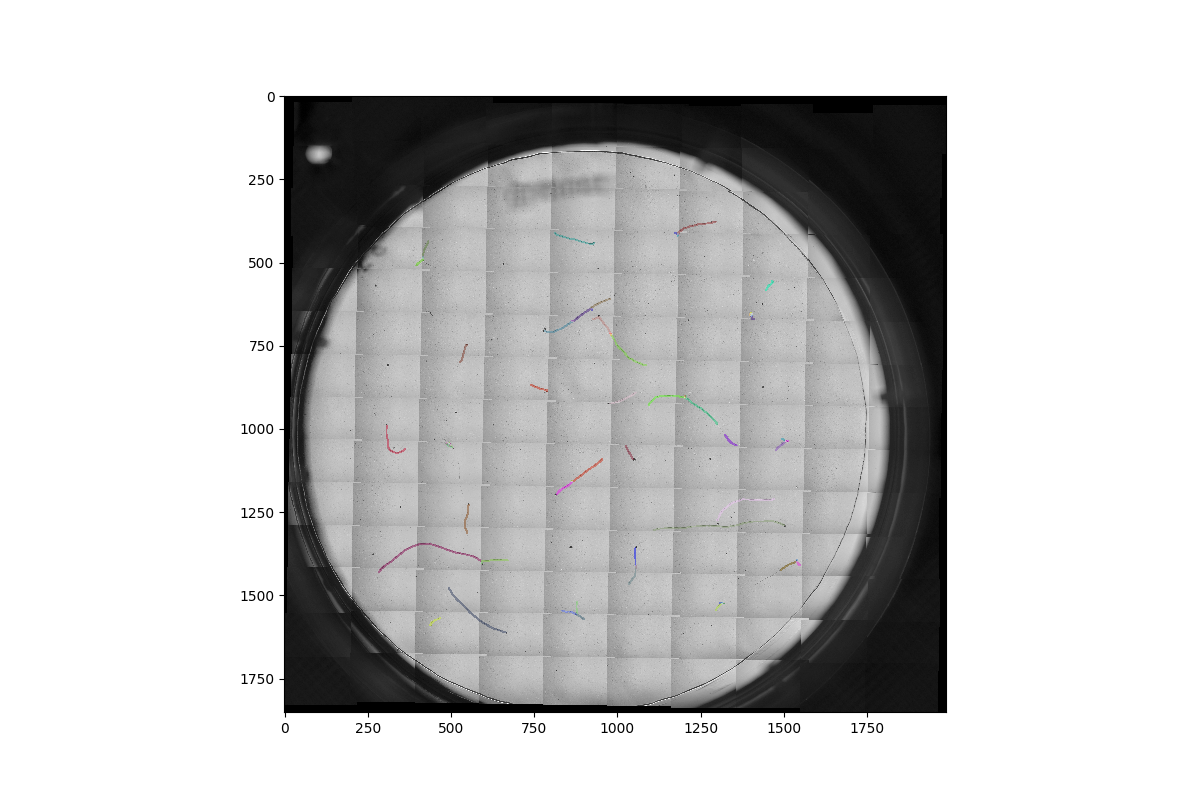

In [38]:
%matplotlib widget
t = 0
plot_full_image_with_features(exp, t, edges=edges_center, dilation=5,downsizing =25)

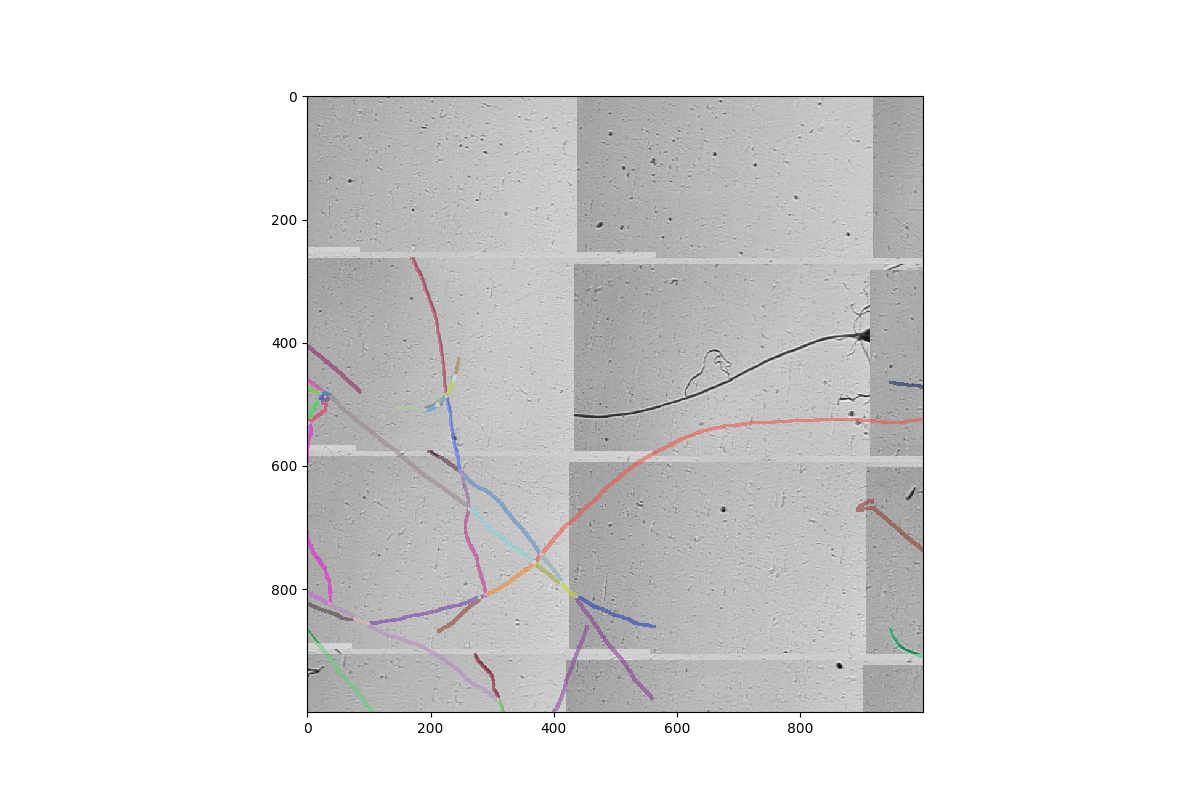

In [38]:
plot_full_image_with_features(
    exp,
    t,
    edges=get_all_edges(exp, t),
    dilation=5,
    region=[[10000, 10000], [15000, 15000]],
)

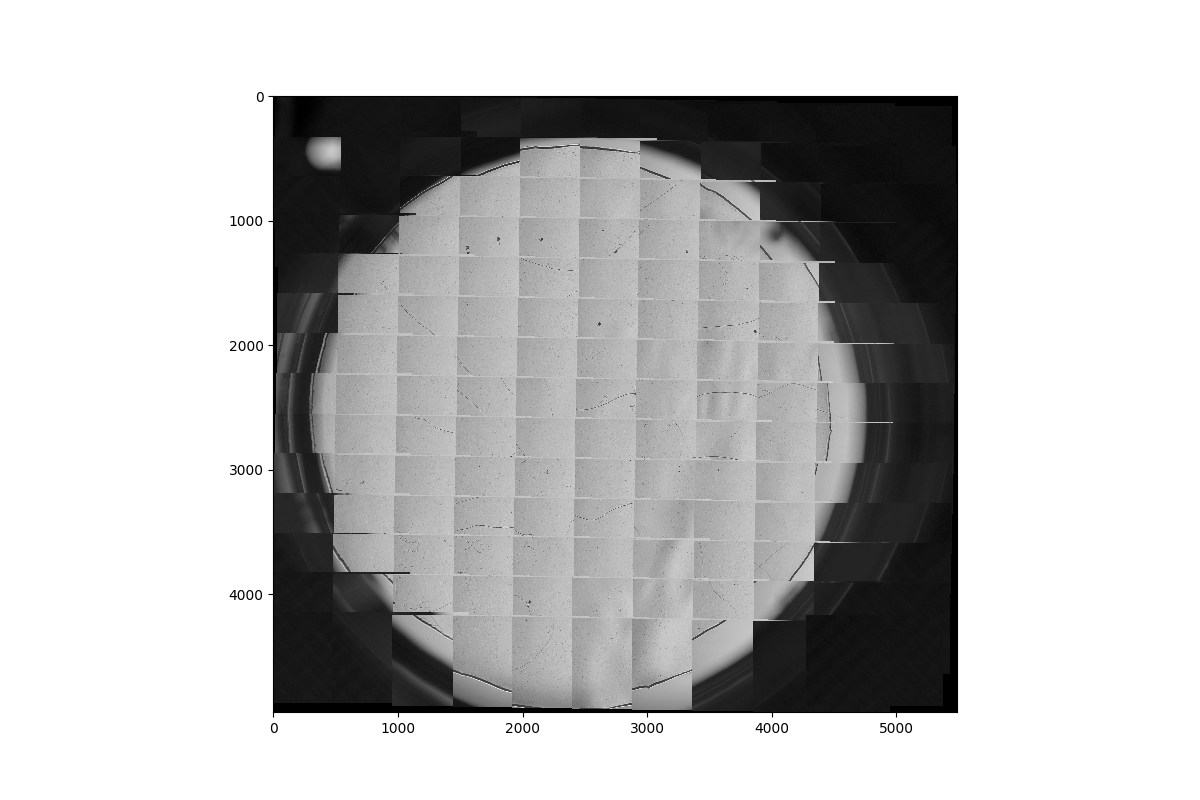

In [13]:
plot_full_image_with_features(exp, t)

In [ ]:
plt.close("all")
start = 0
finish = start + 2
for i in range(start, finish):
    plot_t_tp1([], [], None, None, skels[i], skels[i])

In [21]:
%matplotlib widget

import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)


import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

In [25]:
select = folders
folder_list = list(select["folder"])

In [26]:
folder_list

['20220920_1045_Plate01',
 '20220921_1627_Plate01',
 '20220923_1158_Plate01',
 '20220926_2012_Plate01',
 '20220930_1812_Plate01',
 '20221003_1950_Plate01']

In [47]:
directory = directory_targ
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
masks = []
kernel = np.ones((5, 5), np.uint8)
itera = 5
start = 3
finish = start + 1
kernel = np.ones((5, 5), np.uint8)
for folder in folder_list[start:finish]:
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    ims.append(im)

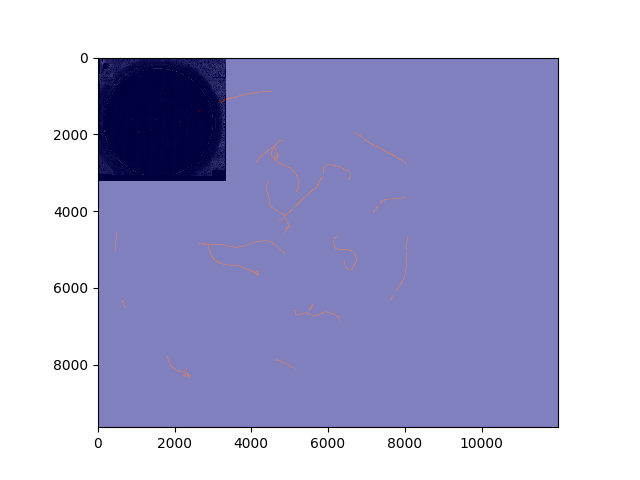

In [48]:
kernel = np.ones((5, 5), np.uint8)
for i in range(len(skels)):
    plot_t_tp1([], [], None, None, skels[i], ims[i])

In [49]:
folder_list = list(folders["folder"])
folder_list.sort()

dilateds = []
skel_docs = []
directory_name = folder_list[0]
path_snap = directory + directory_name
skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned.mat")
skel = skel_info["skeleton"]
skel_doc = sparse_to_doc(skel)
skel_docs.append(skel_doc)
Rs = [np.array([[1, 0], [0, 1]])]
ts = [np.array([0, 0])]
for i, directory_name in enumerate(folder_list[1:]):
    path_snap = directory + directory_name
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
    skel = skel_info["skeleton"]
    skel_doc = sparse_to_doc(skel)
    skel_docs.append(skel_doc)
    try:
        transform = sio.loadmat(path_snap + "/Analysis/transform.mat")
    except:
        transform = sio.loadmat(path_snap + "/Analysis/transform_corrupt.mat")
    R, t = transform["R"], transform["t"]
    Rs.append(R)
    ts.append(t)

In [57]:
Rs[1][1, 1] >= 0.99

0.3109844509981427

In [52]:
folders

,total_path,Plate,strain,medium,CrossDate,/Img/TileConfiguration.txt.registered,/Analysis/skeleton_compressed.mat,/Analysis/skeleton_masked_compressed.mat,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,unique_id,datetime
487,/projects/0/einf914/data/20220920_1441_Plate01,022,'A5-C2','control',20220920,True,True,True,True,False,False,True,True,True,False,"20.09.2022, 14:41:",20220920_1441_Plate01,22_20220920,2022-09-20 14:41:00
391,/projects/0/einf914/data/20220921_1719_Plate01,022,'A5-C2','control',20220920,True,True,True,True,True,False,True,True,True,False,"21.09.2022, 17:19:",20220921_1719_Plate01,22_20220920,2022-09-21 17:19:00
325,/projects/0/einf914/data/20220923_1450_Plate01,022,'A5-C2','control',20220920,True,True,True,True,True,False,True,True,True,False,"23.09.2022, 14:50:",20220923_1450_Plate01,22_20220920,2022-09-23 14:50:00
390,/projects/0/einf914/data/20220926_1129_Plate01,022,'A5-C2','control',20220920,True,True,True,True,True,True,True,True,True,True,"26.09.2022, 11:29:",20220926_1129_Plate01,22_20220920,2022-09-26 11:29:00
176,/projects/0/einf914/data/20220930_1928_Plate01,022,'A5-C2','control',20220920,True,True,True,True,True,True,True,True,True,False,"30.09.2022, 19:28:",20220930_1928_Plate01,22_20220920,2022-09-30 19:28:00
252,/projects/0/einf914/data/20221003_1832_Plate01,022,'A5-C2','control',20220920,True,True,True,True,True,False,True,True,True,False,"03.10.2022, 18:32:",20221003_1832_Plate01,22_20220920,2022-10-03 18:32:00


In [62]:
np.linalg.norm(ts[1])

(11357.730348591991,
 [array([0, 0]),
  array([[ 9066.73898019, -6840.4885013 ]]),
  array([[774.76396477,  56.16505142]]),
  array([[ 3933.9789499 , 10330.82432346]]),
  array([[ 439.34110294, -886.34094869]]),
  array([[-549.65262229,  962.72626544]])])

In [88]:
skel_sparse = skel
dim = skel_sparse.shape

compressed = cv2.resize(
    cv2.dilate(skel_sparse.todense(), kernel, iterations=itera),
    (dim[1] // 5, dim[0] // 5),
)

In [95]:
from amftrack.pipeline.functions.image_processing.realign import (
    transform_skeleton_final,
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [96]:
R0 = np.array([[1, 0], [0, 1]])
t0 = np.array([0, 0])
j = 3
for i, skel in enumerate(skel_docs):
    R0 = np.dot(np.transpose(Rs[i]), R0)
    t0 = -np.dot(ts[i], np.transpose(Rs[i])) + np.dot(t0, np.transpose(Rs[i]))
    directory_name = folder_list[i]
    path_snap = directory + directory_name
    if i == j:
        print(f"saving {i} {path_snap}")
        skel_aligned = transform_skeleton_final(skel, R0, t0).astype(np.uint8)
        skel_sparse_2 = scipy.sparse.csc_matrix(skel_aligned)
        dim = skel_sparse.shape
        kernel = np.ones((5, 5), np.uint8)
        itera = 1
        compressed = cv2.resize(
            cv2.dilate(skel_sparse.todense(), kernel, iterations=itera),
            (dim[1] // 5, dim[0] // 5),
        )

saving 3 /projects/0/einf914/data/20220926_1126_Plate01


In [101]:
Rot, trans = R0, t0
skeleton_doc = skel_doc
skeleton_transformed = {}
transformed_keys = np.round(
    np.transpose(np.dot(Rot, np.transpose(np.array(list(skeleton_doc.keys()))))) + trans
).astype(np.int)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [102]:
faulty = []
for pixel in list(transformed_keys):
    if pixel[0] >= 0 and pixel[1] >= 0:
        skeleton_transformed[(pixel[0], pixel[1])] = 1
    else:
        faulty.append(pixel)

In [107]:
xs = [pos[0] for pos in list(transformed_keys)]
ys = [pos[1] for pos in list(transformed_keys)]

In [114]:
print(len(skeleton_transformed.keys()))
skeleton_transformed2 = dilate(skeleton_transformed)
print(len(skeleton_transformed2.keys()))
skeleton_transformed3 = zhangSuen(skeleton_transformed2)
print(len(skeleton_transformed3.keys()))

308415
1081664
307355


In [133]:
skeleton_transformed_sparse = sparse.lil_matrix((30000, 60000)).astype(np.uint8)
for pixel in list(skeleton_transformed.keys()):
    # if pixel[0]<30000 and pixel[1]<60000:
    skeleton_transformed_sparse[(pixel[0], pixel[1])] = 1

In [134]:
skel_sparse = scipy.sparse.csc_matrix(skeleton_transformed_sparse, shape=(30000, 60000))

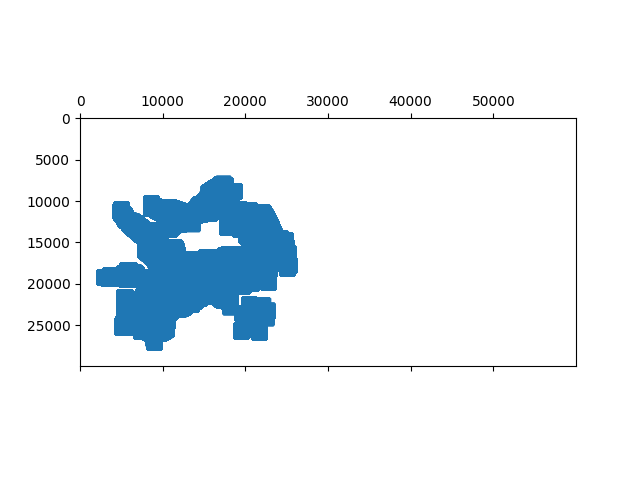

In [135]:
fig, ax = plt.subplots()
ax.spy(skeleton_transformed_sparse)

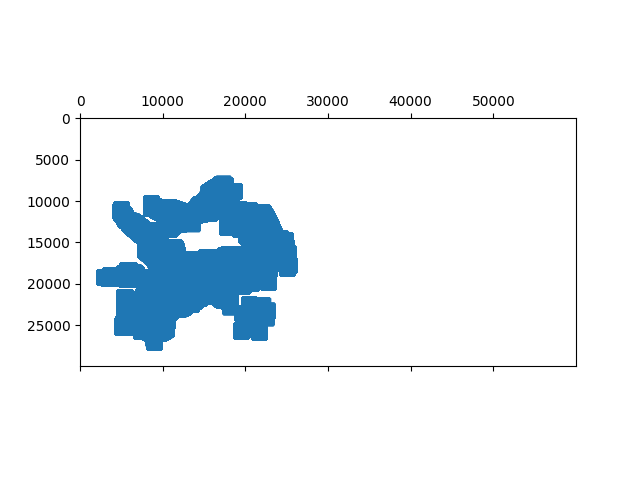

In [136]:
fig, ax = plt.subplots()
ax.spy(skel_sparse)

In [137]:
print(np.sum(skel_sparse))
print(np.sum(skeleton_transformed_sparse))

308415
308415


In [98]:
skeleton_transformed = {}
transformed_keys = np.round(
    np.transpose(np.dot(Rot, np.transpose(np.array(list(skeleton_doc.keys()))))) + trans
).astype(np.int)
for pixel in list(transformed_keys):
    if pixel[0] >= 0 and pixel[1] >= 0:
        skeleton_transformed[(pixel[0], pixel[1])] = 1
    else:
        # print("some negative pixels")
        pass
skeleton_transformed = dilate(skeleton_transformed)
skeleton_transformed = zhangSuen(skeleton_transformed)
skeleton_transformed_sparse = sparse.lil_matrix((30000, 60000)).astype(np.uint8)
for pixel in list(skeleton_transformed.keys()):
    # if pixel[0]<30000 and pixel[1]<60000:
    skeleton_transformed_sparse[(pixel[0], pixel[1])] = 1

(array([[ 0.99912832,  0.0417445 ],
        [-0.0417445 ,  0.99912832]]),
 array([[3798.09994568, 1033.43393825]]))

In [92]:
np.sum(skel_sparse)

308626

In [97]:
np.sum(skel_sparse_2)

120357

In [90]:
skel = read_mat(path_snap + "/Analysis/skeleton_masked.mat")["skeleton"]
skeleton = scipy.sparse.dok_matrix(skel)

In [91]:
skeleton.shape

(26553, 27424)

In [164]:
# select = all_folders.loc[(all_folders['folder'].isin([ '20210929_0308_Plate21',
#  '20210929_0912_Plate21']))]
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5, 5), np.uint8)
itera = 5
start = 2

# start = choice(range(len(folder_list)))
finish = start + 2
for folder in folder_list[start:finish]:
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    #     im = imageio.imread(path_snap+'/StitchedImage.tif')
    #     im = cv2.resize(im,(skel.shape[1],skel.shape[0]))
    #     M = np.float32([
    # 	[1, 0, 0],
    # 	[0, 1, -117]])
    #     im = cv2.warpAffine(im,M,(im.shape[1], im.shape[0]))
    ims.append(im)